In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

stud = pd.read_csv(r'C:\Users\dbezu\Downloads\stud_math.xls')
stud

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [3]:
# Для удобства можно переименовать колонки
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [4]:
stud.columns=['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']
stud

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [12]:
# Анализ значений параметра успеваемости (score), относительно которого в данном случае проводится исследование

In [5]:
# Количественное распределение оценок
stud.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

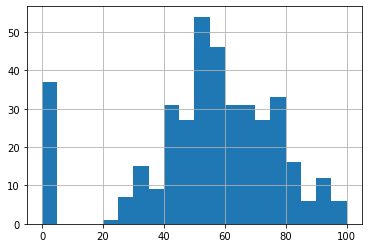

In [8]:
# Гистограмма распределения значений параметра
stud.score.hist(bins=20)

In [18]:
# Несмотря на всплеск количества нулевых оценок, выбивающийся из общей картины распределения,
# данные значения могут не являться выбросами.
stud.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [19]:
# Определение диапазона допустимых значений 
q1=stud.score.quantile(0.25)
q3=stud.score.quantile(0.75)
iqr=q3-q1
h=q3+iqr*1.5
l=q1-iqr*1.5
h,l

(115.0, -5.0)

In [ ]:
# Таким образом, выбросов нет

In [10]:
# Проверка на наличие NaN-значений
stud.score.isnull().value_counts()

False    389
True       6
Name: score, dtype: int64

In [11]:
# Можно удалить строки с неопределенным значением ключевого параметра (score)
stud=stud.loc[stud.score<=100]
stud

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [13]:
# Ниже проверка на предмет наличия аномальных значений параметров по столбцам

In [14]:
stud.school.value_counts()

GP    344
MS     45
Name: school, dtype: int64

In [15]:
stud.sex.value_counts()

F    204
M    185
Name: sex, dtype: int64

In [16]:
stud.age.value_counts()

16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64

In [17]:
stud.address.value_counts()

U    291
R     83
Name: address, dtype: int64

In [20]:
stud.famsize.value_counts()

GT3    255
LE3    107
Name: famsize, dtype: int64

In [21]:
stud.pstatus.value_counts()

T    308
A     36
Name: pstatus, dtype: int64

In [22]:
stud.medu.value_counts()

4.0    131
2.0    100
3.0     96
1.0     56
0.0      3
Name: medu, dtype: int64

In [23]:
stud.fedu.value_counts()

2.0     105
3.0      94
4.0      88
1.0      75
0.0       2
40.0      1
Name: fedu, dtype: int64

In [24]:
# Удаляем строку с аномальным значением 40
stud=stud.loc[stud.fedu!=40]
stud

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [25]:
stud.mjob.value_counts()

other       127
services     97
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

In [26]:
stud.fjob.value_counts()

other       193
services     99
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

In [27]:
stud.reason.value_counts()

course        135
reputation    101
home          101
other          34
Name: reason, dtype: int64

In [28]:
stud.guardian.value_counts()

mother    248
father     85
other      24
Name: guardian, dtype: int64

In [29]:
stud.traveltime.value_counts()

1.0    239
2.0     94
3.0     20
4.0      7
Name: traveltime, dtype: int64

In [30]:
stud.studytime.value_counts()

2.0    189
1.0    103
3.0     62
4.0     27
Name: studytime, dtype: int64

In [31]:
stud.failures.value_counts()

0.0    289
1.0     48
2.0     15
3.0     14
Name: failures, dtype: int64

In [32]:
stud.schoolsup.value_counts()

no     330
yes     49
Name: schoolsup, dtype: int64

In [33]:
stud.famsup.value_counts()

yes    215
no     135
Name: famsup, dtype: int64

In [34]:
stud.paid.value_counts()

no     196
yes    153
Name: paid, dtype: int64

In [35]:
stud.activities.value_counts()

yes    191
no     183
Name: activities, dtype: int64

In [36]:
stud.nursery.value_counts()

yes    296
no      77
Name: nursery, dtype: int64

In [37]:
stud['studytime, granular'].value_counts()

-6.0     189
-3.0     103
-9.0      62
-12.0     27
Name: studytime, granular, dtype: int64

In [38]:
stud.higher.value_counts()

yes    349
no      19
Name: higher, dtype: int64

In [39]:
stud.internet.value_counts()

yes    299
no      55
Name: internet, dtype: int64

In [40]:
stud.romantic.value_counts()

no     234
yes    123
Name: romantic, dtype: int64

In [41]:
stud.famrel.value_counts()

 4.0    178
 5.0     96
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [42]:
# Удаляем строку с аномальным значением -1
stud=stud.loc[stud.famrel!=-1]
stud

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [43]:
stud.freetime.value_counts()

3.0    152
4.0    110
2.0     61
5.0     37
1.0     18
Name: freetime, dtype: int64

In [44]:
stud.goout.value_counts()

3.0    126
2.0     99
4.0     81
5.0     51
1.0     23
Name: goout, dtype: int64

In [45]:
stud.health.value_counts()

5.0    136
3.0     88
4.0     59
1.0     47
2.0     42
Name: health, dtype: int64

In [46]:
stud.absences.value_counts()

0.0      110
2.0       60
4.0       51
6.0       30
8.0       20
10.0      17
12.0      12
14.0      11
3.0        7
16.0       7
7.0        6
18.0       5
5.0        5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

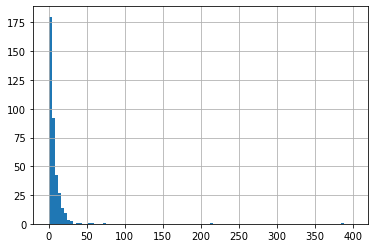

In [48]:
# Смотрим гистограмму распределения значений
stud.absences.hist(bins=100, range=(0,400))

In [49]:
# Судя гистограмме высока вероятность пристутствия выбросов 
# Определение наличия выбросов
q1=stud.absences.quantile(0.25)
q3=stud.absences.quantile(0.75)
iqr=q3-q1
h=q3+iqr*1.5
l=q1-iqr*1.5
h,l

(20.0, -12.0)

In [50]:
# Ограничиваем выборку по верхнему порогу в 20 пропусков
stud=stud.loc[stud.absences<=20]
stud

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,...,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [ ]:
# Корреляционный анализ

In [51]:
# Создаем матрицу корреляций для числовых переменных
stud.corr()

,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.168805,-0.166681,0.081581,0.002755,0.183245,-0.002755,0.054576,0.036956,0.123274,-0.061618,0.158915,-0.159303
medu,-0.168805,1.000000,0.630589,-0.188411,0.088130,-0.239078,-0.088130,-0.016936,0.036623,0.054977,-0.052923,0.070282,0.210282
fedu,-0.166681,0.630589,1.000000,-0.144825,0.003167,-0.283302,-0.003167,-0.030494,-0.009167,0.043267,0.019584,-0.021412,0.111636
traveltime,0.081581,-0.188411,-0.144825,1.000000,-0.108298,0.073569,0.108298,-0.053151,-0.005921,0.027669,0.001530,-0.046846,-0.077995
studytime,0.002755,0.088130,0.003167,-0.108298,1.000000,-0.169041,-1.000000,0.014993,-0.141286,-0.037274,-0.087502,-0.069229,0.110724
failures,0.183245,-0.239078,-0.283302,0.073569,-0.169041,1.000000,0.169041,0.023885,0.097370,0.086849,0.093352,0.064583,-0.328495
"studytime, granular",-0.002755,-0.088130,-0.003167,0.108298,-1.000000,0.169041,1.000000,-0.014993,0.141286,0.037274,0.087502,0.069229,-0.110724
famrel,0.054576,-0.016936,-0.030494,-0.053151,0.014993,0.023885,-0.014993,1.000000,0.169973,0.082824,0.094629,-0.075659,0.056259
freetime,0.036956,0.036623,-0.009167,-0.005921,-0.141286,0.097370,0.141286,0.169973,1.000000,0.281734,0.045982,0.103852,0.034553
goout,0.123274,0.054977,0.043267,0.027669,-0.037274,0.086849,0.037274,0.082824,0.281734,1.000000,0.009364,0.118877,-0.123170


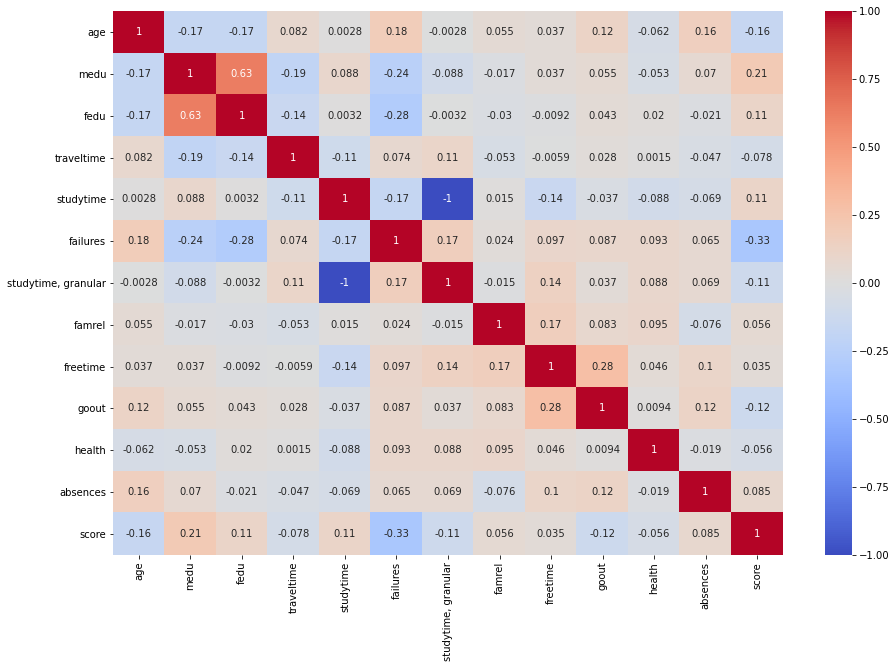

In [52]:
# Для наглядности и удобства можно воспользоваться тепловой картой
correlation=stud.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [53]:
# Исходя из полученной картины можно сделать вывод о вероятном наибольшем влиянии факторов на успеваемость:
# 1. Внеучебных неудач (чем больше неудач, тем ниже успеваемость)
# 2. Уровня образовании матери (положительная корреляция)
# 3. Возраста ученика (чем старше, тем ниже балл)
# 4. Времени, проведенного с друзьями (чем больше, тем ниже балл)
# Также, видна абсолютная отрицательная корреляция между параметрами 'studytime' и 'studytime, granular'.
# Таким образом, последний параметр можно исключить из анализа.


In [54]:
# Анализ номинативных переменных

In [55]:
# Создаем функцию для построения графиков типа box plot
def bp(column):
    sns.boxplot(x=column, y='score',data=stud)

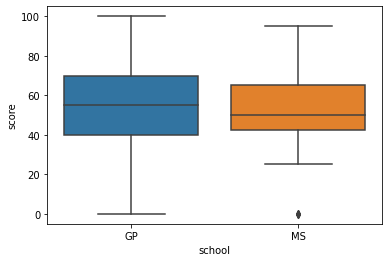

In [57]:
# Применяем функцию последовательно для номинативных переменных
bp('school')

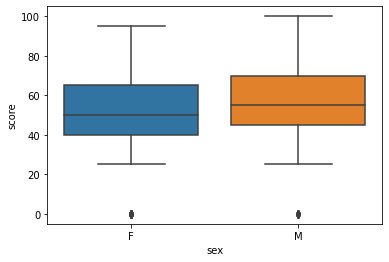

In [58]:
bp('sex')

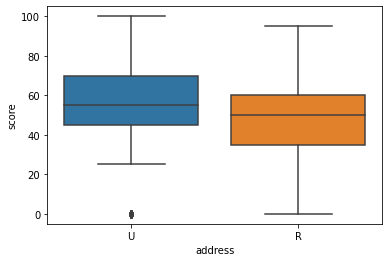

In [59]:
bp('address')

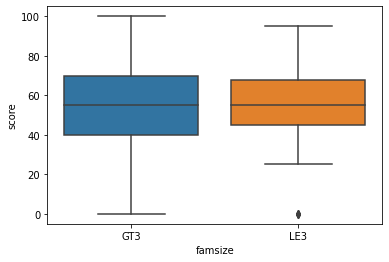

In [60]:
bp('famsize')

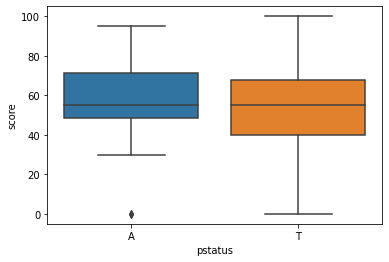

In [61]:
bp('pstatus')

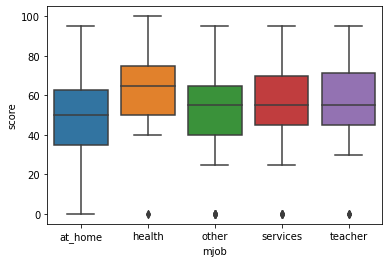

In [62]:
bp('mjob')

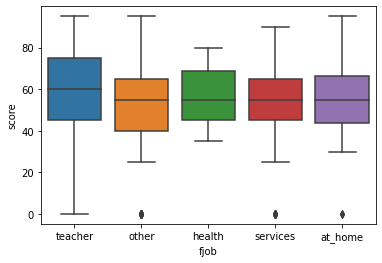

In [63]:
bp('fjob')

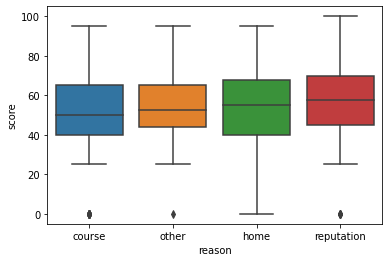

In [64]:
bp('reason')

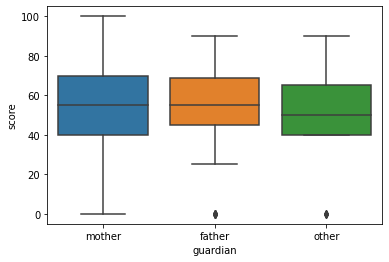

In [65]:
bp('guardian')

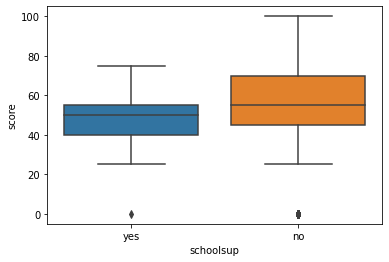

In [66]:
bp('schoolsup')

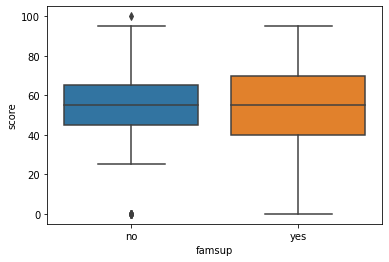

In [67]:
bp('famsup')

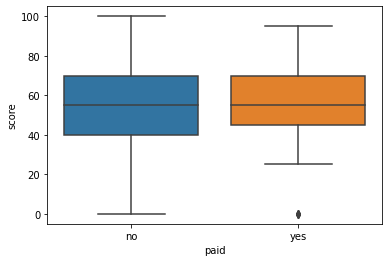

In [68]:
bp('paid')

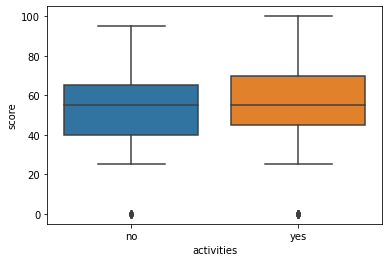

In [69]:
bp('activities')

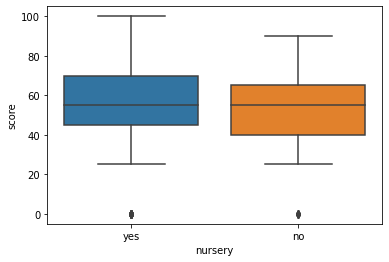

In [70]:
bp('nursery')

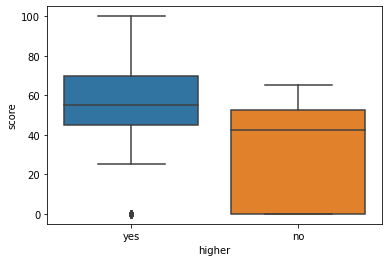

In [71]:
bp('higher')

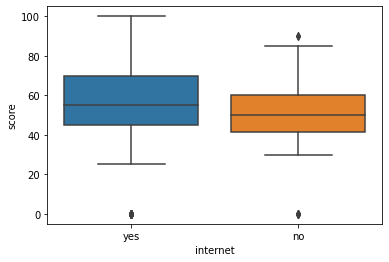

In [72]:
bp('internet')

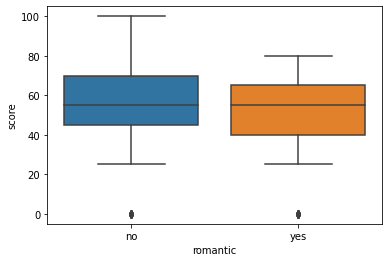

In [73]:
bp('romantic')

In [74]:
# Исходя из графиков, наиболее значительное влияние на успеваемость могут оказывать параметры:
# - Тип адреса ученика ('address')
# - Работа матери ('mjob')
# - Дополнительная образовательная поддержка ('schoolsup')
# - Желание получить высшее образование ('higher')

In [75]:
# Выводы:
# - В данных мало выбросов, но часто встречаются ячейки с неопределенными значениями ('NaN'). 
# Данные нельзя назвать очень чистыми.
# - Параметры, представляющиеся наиболее подходящими для построения дальнейшей модели - 
# 'address', 'mjob', 'schoolsup', 'higher', 'failures', 'medu','age','goout'.